# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning Para Aplicações de IA com PyTorch e Lightning</font>
## <font color='blue'>Mini-Projeto 8</font>
### <font color='blue'>Fiscalizando o Uso de Recursos Públicos com IA Para Detectar Buracos em Imagens de Estradas</font>

![DSA](imagens/MP8.png)

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.5


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
!pip install -q opencv-python==4.9.0.80

In [4]:
!pip install -q tensorflow==2.15

In [5]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [6]:
# Imports
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [7]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

tensorflow: 2.15.0
cv2       : 4.9.0
numpy     : 1.24.1
matplotlib: 3.8.0
keras     : 2.15.0
pandas    : 2.0.3



## Verificando as Imagens

In [8]:
# Verificando as imagens
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset/nova_imagem2.jpg
dataset/nova_imagem1.jpg
dataset/potholes/63.jpg
dataset/potholes/189.jpg
dataset/potholes/77.jpg
dataset/potholes/162.jpg
dataset/potholes/176.jpg
dataset/potholes/88.jpg
dataset/potholes/228.jpg
dataset/potholes/214.jpg
dataset/potholes/200.jpg
dataset/potholes/201.jpg
dataset/potholes/215.jpg
dataset/potholes/229.jpg
dataset/potholes/177.jpg
dataset/potholes/89.jpg
dataset/potholes/163.jpg
dataset/potholes/188.jpg
dataset/potholes/76.jpg
dataset/potholes/62.jpg
dataset/potholes/74.jpg
dataset/potholes/60.jpg
dataset/potholes/48.jpg
dataset/potholes/149.jpg
dataset/potholes/175.jpg
dataset/potholes/161.jpg
dataset/potholes/203.jpg
dataset/potholes/217.jpg
dataset/potholes/216.jpg
dataset/potholes/202.jpg
dataset/potholes/160.jpg
dataset/potholes/174.jpg
dataset/potholes/148.jpg
dataset/potholes/49.jpg
dataset/potholes/61.jpg
dataset/potholes/75.jpg
dataset/potholes/59.jpg
dataset/potholes/71.jpg
dataset/potholes/65.jpg
dataset/potholes/170.jpg
dataset/pothole

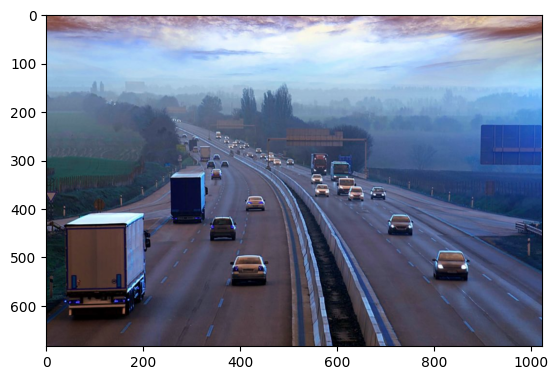

In [9]:
plt.imshow(cv2.imread("dataset/normal/8.jpg"))

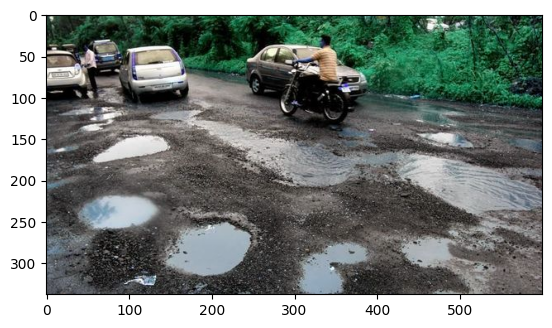

In [10]:
plt.imshow(cv2.imread("dataset/potholes/10.jpg"))

## Pré-Processamento de Dados

In [11]:
# Gerador de dados de treino
datagen_treino = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                 shear_range = 0.2,
                                                                 zoom_range = 0.2,
                                                                 horizontal_flip = True,
                                                                 validation_split = 0.2)

In [12]:
# Dataset de treino
dataset_treino = datagen_treino.flow_from_directory('dataset/',
                                                    target_size = (64, 64),
                                                    batch_size = 32,
                                                    class_mode = 'binary',
                                                    subset = "training")

Found 504 images belonging to 2 classes.


In [13]:
# Dataset de validação
dataset_valid = datagen_treino.flow_from_directory("dataset", 
                                                   target_size = (64, 64),
                                                   batch_size = 32,
                                                   class_mode = 'binary',
                                                   subset = 'validation')

Found 126 images belonging to 2 classes.


## Construção do Modelo

In [14]:
# Cria sequência de camadas
modelo_dsa = tf.keras.models.Sequential()

In [15]:
# Camada de convolução
modelo_dsa.add(tf.keras.layers.Conv2D(filters = 32, 
                                      kernel_size = 3, 
                                      activation = 'relu', 
                                      input_shape = [64, 64, 3]))

In [16]:
# Camada de Pooling
modelo_dsa.add(tf.keras.layers.MaxPool2D(pool_size = 2, 
                                         strides = 2))

In [17]:
# Segunda camada de convolução e pooling
modelo_dsa.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
modelo_dsa.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [18]:
# Flatten
modelo_dsa.add(tf.keras.layers.Flatten())

In [19]:
# Camada totalmente conectada
modelo_dsa.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [20]:
# Camada de saída
modelo_dsa.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [21]:
# Compilação do modelo
modelo_dsa.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Desafio: Converta este mini-projeto do TensorFlow para o PyTorch.

## Treinamento do Modelo

In [22]:
modelo_dsa.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [23]:
%%time
modelo_dsa.fit(x = dataset_treino, validation_data = dataset_valid, epochs = 25)

Epoch 1/25
16/16 [==============================] - 6s 351ms/step - loss: 0.6949 - accuracy: 0.5933 - val_loss: 0.6043 - val_accuracy: 0.6905
Epoch 2/25
16/16 [==============================] - 5s 322ms/step - loss: 0.5130 - accuracy: 0.7560 - val_loss: 0.4349 - val_accuracy: 0.8175
Epoch 3/25
16/16 [==============================] - 5s 334ms/step - loss: 0.3599 - accuracy: 0.8631 - val_loss: 0.5179 - val_accuracy: 0.7698
Epoch 4/25
16/16 [==============================] - 5s 321ms/step - loss: 0.2671 - accuracy: 0.9067 - val_loss: 0.3673 - val_accuracy: 0.8254
Epoch 5/25
16/16 [==============================] - 5s 327ms/step - loss: 0.2104 - accuracy: 0.9147 - val_loss: 0.3940 - val_accuracy: 0.8175
Epoch 6/25
16/16 [==============================] - 5s 328ms/step - loss: 0.1726 - accuracy: 0.9325 - val_loss: 0.3807 - val_accuracy: 0.8413
Epoch 7/25
16/16 [==============================] - 5s 325ms/step - loss: 0.2104 - accuracy: 0.9127 - val_loss: 0.4103 - val_accuracy: 0.8175
Epoch 

## Deploy e Uso do Modelo

In [24]:
# Nova imagem
nova_imagem = image.load_img('dataset/nova_imagem1.jpg', target_size = (64, 64))
#nova_imagem = image.load_img('dataset/nova_imagem2.jpg', target_size = (64, 64))

In [25]:
# Converte a imagem em array
nova_imagem = image.img_to_array(nova_imagem)

In [26]:
# Ajusta as dimensões
nova_imagem = np.expand_dims(nova_imagem, axis = 0)

In [27]:
# Previsão
previsao = modelo_dsa.predict(nova_imagem)

1/1 [==============================] - 0s 26ms/step


In [28]:
previsao

array([[1.]], dtype=float32)

In [29]:
# Índices
dataset_treino.class_indices

{'normal': 0, 'potholes': 1}

In [30]:
if previsao[0][0] == 1:
    resultado = 'Buraco na estrada. Comunique o Órgão Responsável no Governo!'
else:
    resultado = 'Imagem Normal!'

In [31]:
print(resultado)

Buraco na estrada. Comunique o Órgão Responsável no Governo!


# Fim